Implement a KNN model to classify the animals in to categorie


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split

In [2]:
#load the data
zoo_df=pd.read_csv('Zoo.csv')
zoo_df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## Data Exploration

In [3]:
#checking for null values
zoo_df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [4]:
# checking for duplicate values
zoo_df[zoo_df.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [5]:
# Descriptive analysis
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
zoo_df.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


As we show that mean of all feature aur aprox near by each other which means data are in same scale

In [7]:
zoo_df['type'].value_counts().sort_index(ascending=True)

1    41
2    20
3     5
4    13
5     4
6     8
7    10
Name: type, dtype: int64

As we show that the Type 1 and 2 alone contain max number of values it means that data is unblanced 

## Exploratory Data Analysis

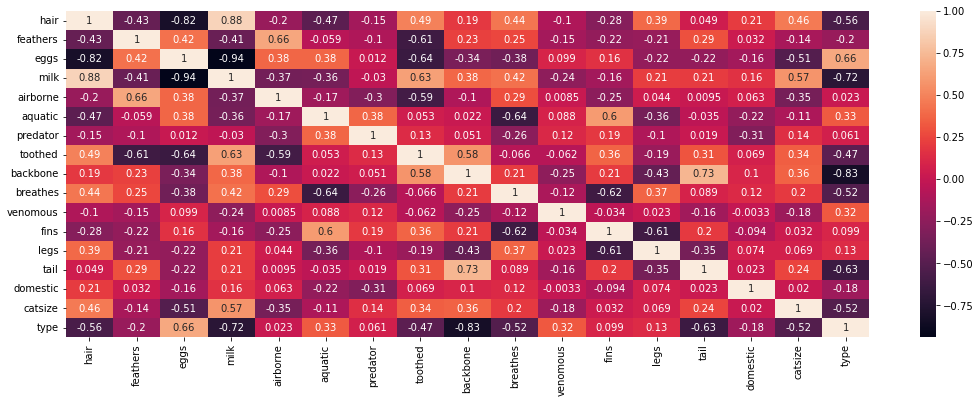

In [8]:
# Heatmap visualization
fig= plt.figure(figsize=(18, 6))
sns.heatmap(zoo_df.corr(), annot=True);

<AxesSubplot:xlabel='domestic', ylabel='count'>

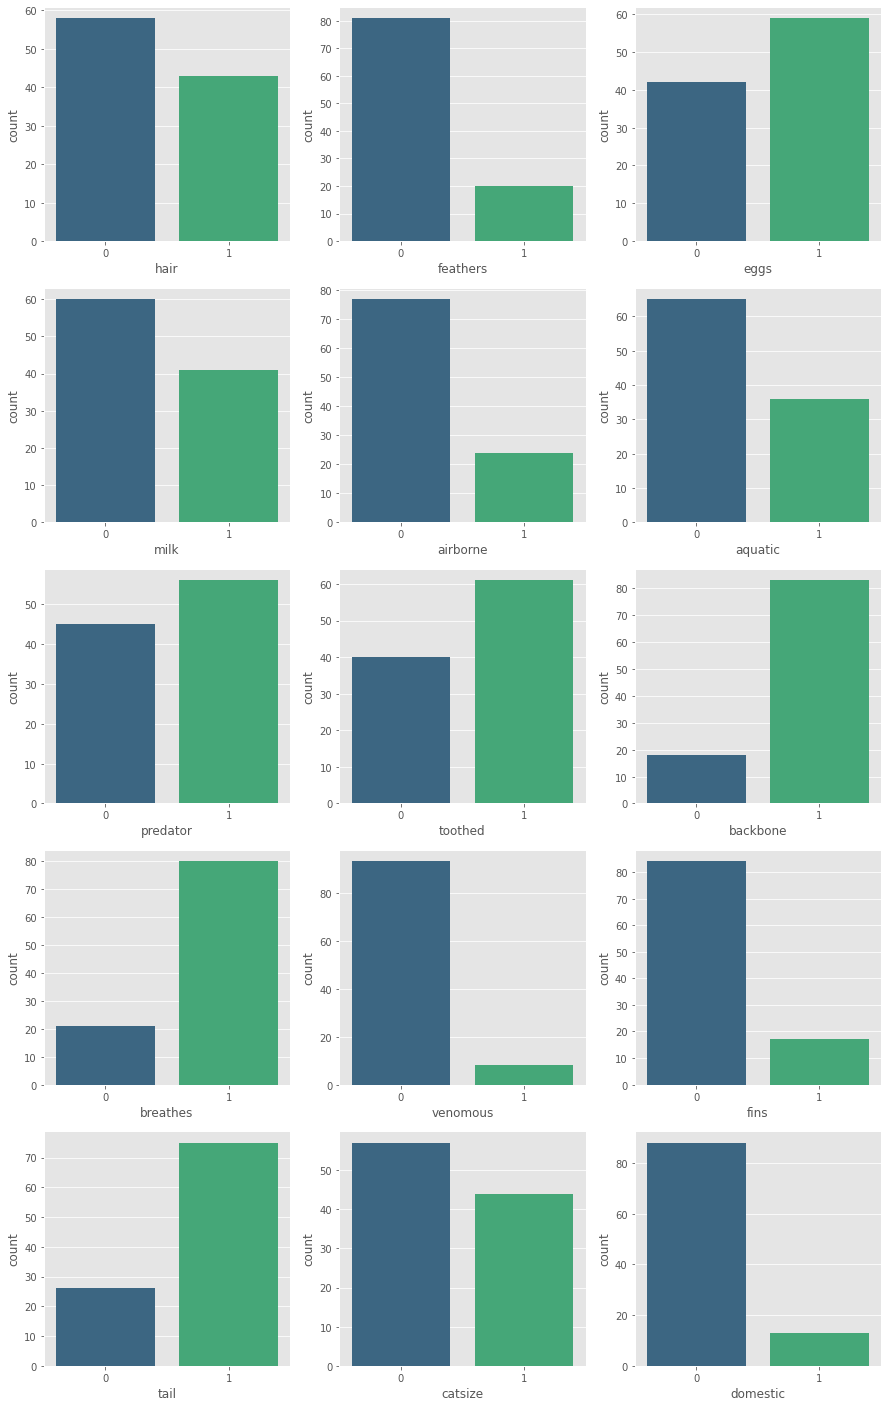

In [9]:
# Histogram visualization 
plt.style.use("ggplot")
fig, ax =plt.subplots(5,3, figsize=(15,25)) 
sns.countplot(zoo_df["hair"], palette="viridis", ax=ax[0,0])
sns.countplot(zoo_df["feathers"], palette="viridis", ax=ax[0,1])
sns.countplot(zoo_df["eggs"], palette="viridis", ax=ax[0,2])
sns.countplot(zoo_df["milk"], palette="viridis", ax=ax[1,0])
sns.countplot(zoo_df["airborne"], palette="viridis", ax=ax[1,1])
sns.countplot(zoo_df["aquatic"], palette="viridis", ax=ax[1,2])
sns.countplot(zoo_df["predator"], palette="viridis", ax=ax[2,0])
sns.countplot(zoo_df["toothed"], palette="viridis", ax=ax[2,1])
sns.countplot(zoo_df["backbone"], palette="viridis", ax=ax[2,2])
sns.countplot(zoo_df["breathes"], palette="viridis", ax=ax[3,0])
sns.countplot(zoo_df["venomous"], palette="viridis", ax=ax[3,1])
sns.countplot(zoo_df["fins"], palette="viridis", ax=ax[3,2])
sns.countplot(zoo_df["tail"], palette="viridis", ax=ax[4,0])
sns.countplot(zoo_df["catsize"], palette="viridis", ax=ax[4,1])
sns.countplot(zoo_df["domestic"],palette="viridis", ax=ax[4,2])


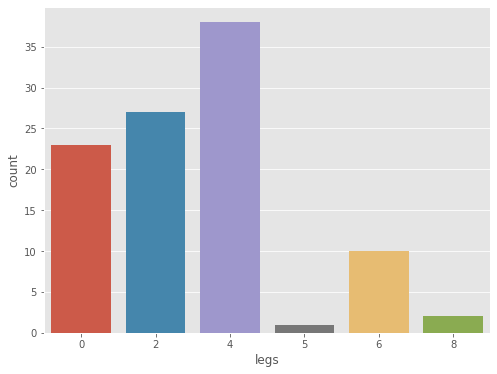

In [10]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(zoo_df["legs"]);

<AxesSubplot:xlabel='fins'>

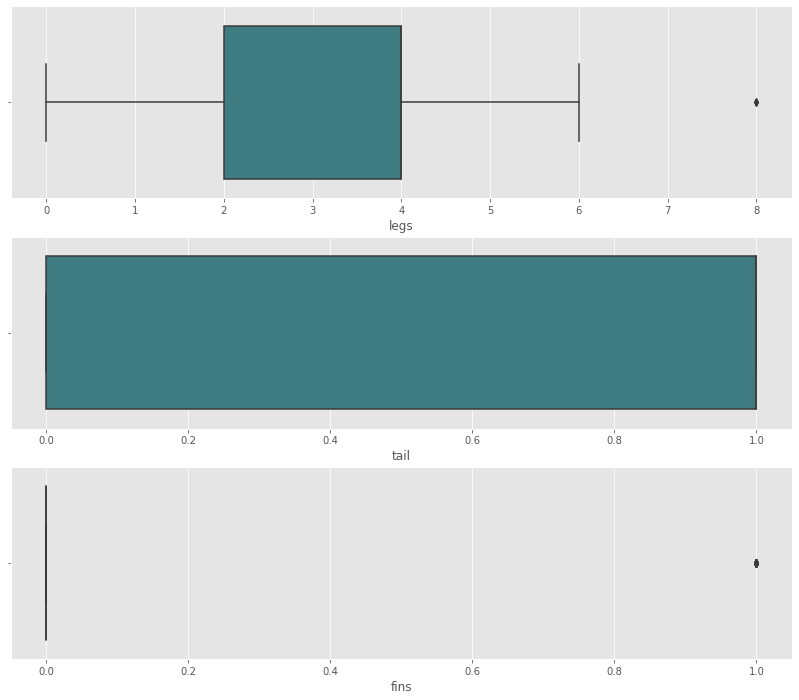

In [11]:
# Checking for outliers
fig, axes=plt.subplots(3,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='legs',data=zoo_df,palette='crest',ax=axes[0])
sns.boxplot(x='tail',data=zoo_df,palette='crest',ax=axes[1])
sns.boxplot(x='fins',data=zoo_df,palette='crest',ax=axes[2])

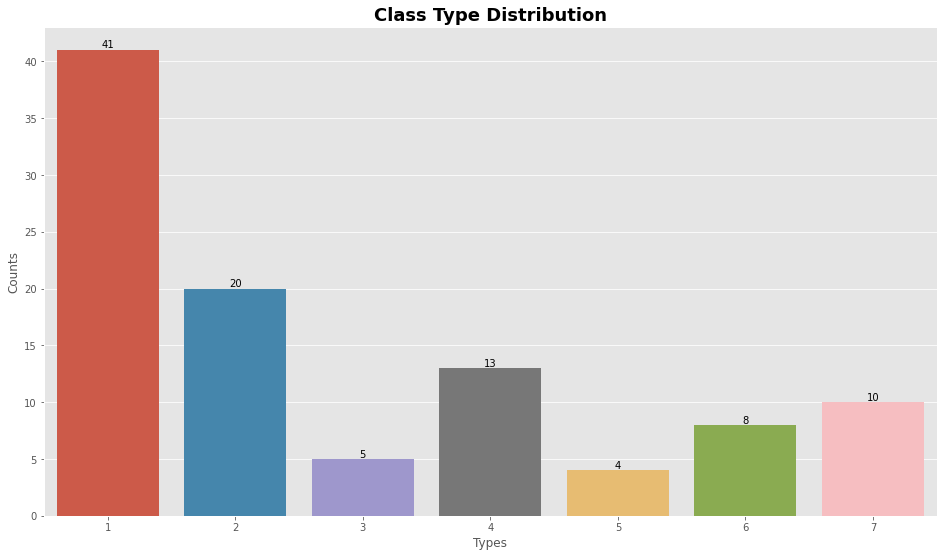

In [12]:
# Bar plot for Type
plt.figure(figsize = (16,9))
ax = sns.barplot(x = zoo_df['type'].value_counts().index.tolist(), y = zoo_df['type'].value_counts().tolist())
plt.title("Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Types')
plt.ylabel('Counts')
for i in ax.containers:
    ax.bar_label(i,)

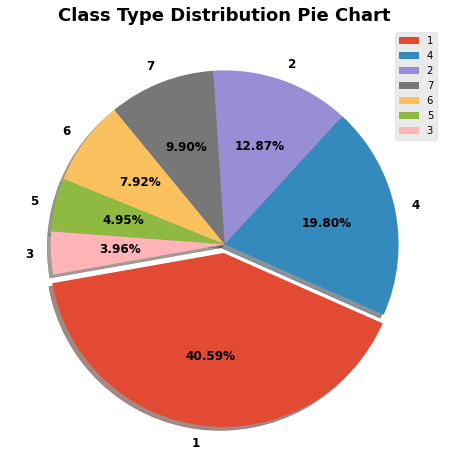

In [13]:
# pie plot for Type
plt.figure(figsize = (12,8))
plt.pie(zoo_df['type'].value_counts(),labels=zoo_df.type.unique(), explode = [0.05,0.0,0.0,0.0,0.0,0.0,0.0],autopct= '%.2f%%',shadow= True,
       startangle= 190, textprops = {'size':'large','fontweight':'bold','rotation':'0','color':'black'})

plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### Data Pre-Processing

In [14]:
# droping unwanted columns
df=zoo_df.copy()
df=zoo_df.drop(['animal name'],axis=1)
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [15]:
# Train_test Split
x = df.drop('type',axis=1)
y = df[['type']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((70, 16), (70, 1), (31, 16), (31, 1))

### Grid search for Choosing the best Value of K

In [16]:
n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors=n_neighbors)

In [17]:
knn = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn, param_grid=param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [18]:
print(grid.best_score_)
print(grid.best_params_)

0.9
{'n_neighbors': 3}


### Visualizing the CV results

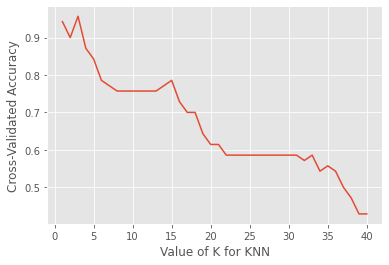

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [20]:
pd.DataFrame(k_scores).sort_values(0,ascending=False).head(10)

,0
2,0.957143
0,0.942857
1,0.900000
3,0.871429
4,0.842857
5,0.785714
14,0.785714
6,0.771429
13,0.771429
11,0.757143


Text(0, 0.5, 'Error Rate')

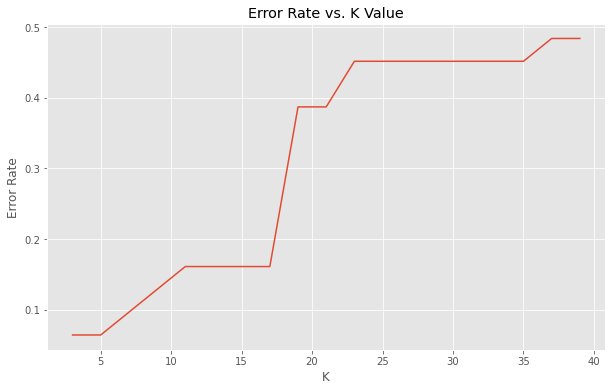

In [21]:
#
error_rate = []
k_range = [i for i in range(3,40, 2)]
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    pred_i = pred_i.reshape(31,1)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot([i for i in range(3,40, 2)],error_rate, markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after K>3 the error rate same at k=5 Let's retrain the model with that and check the classification report

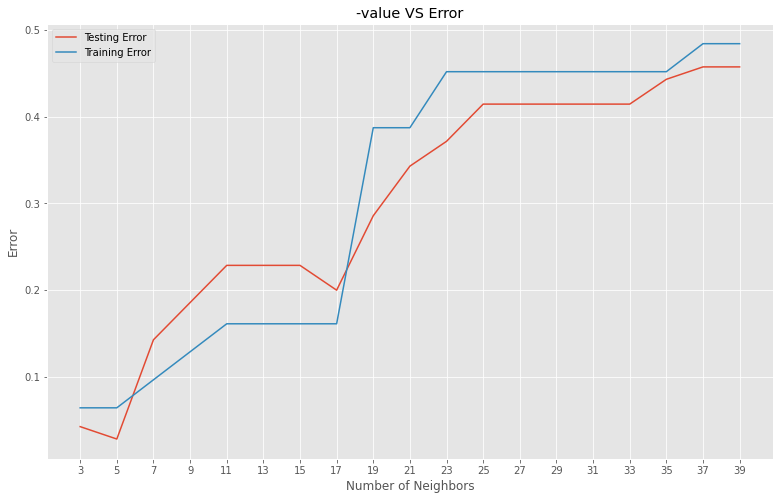

In [22]:
error1= []
error2= []
k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    y_pred1 = y_pred1.reshape(70,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    y_pred2 = y_pred2.reshape(31,1)
    error2.append(np.mean(y_test!= y_pred2))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, error1, label = 'Testing Error')
plt.plot(k_range, error2, label = 'Training Error')
plt.legend()
plt.title('-value VS Error')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.xticks(k_range)
plt.show()

### train_test acuracy

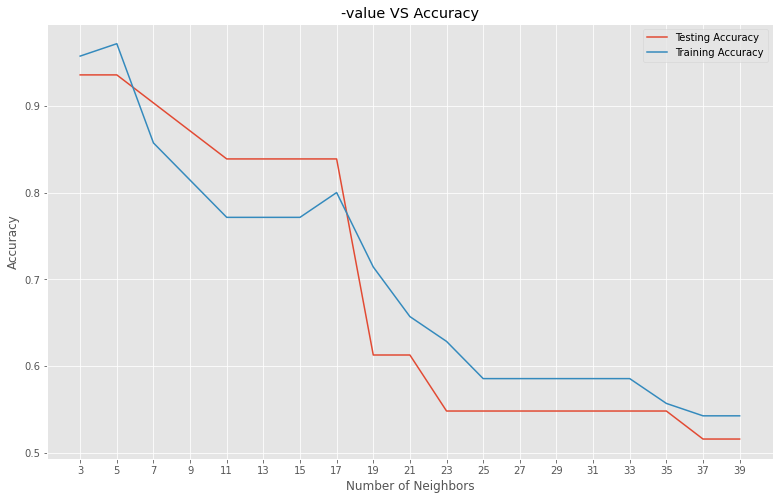

In [23]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test,y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.savefig('graph.png')
plt.show()

###### The best value of K is 3 or 5 lets check for these value in classifiaction Report

### KNN using k=3

WITH K=3




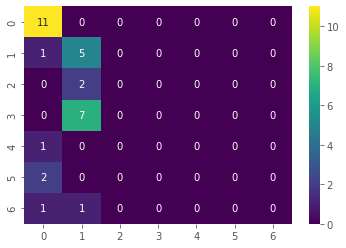



              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.33      0.83      0.48         6
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2

    accuracy                           0.52        31
   macro avg       0.15      0.26      0.18        31
weighted avg       0.31      0.52      0.38        31



In [24]:
knn_3 = KNeighborsClassifier(n_neighbors=3)

knn_3.fit(x_train,y_train)
pred_3 = knn.predict(x_test)

print('WITH K=3')
print('\n')
sns.heatmap(confusion_matrix(y_test, pred_3), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print('\n')
print(classification_report(y_test,pred_3))

### KNN using k=5

WITH K=5




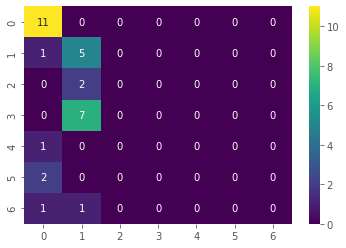



              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.33      0.83      0.48         6
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2

    accuracy                           0.52        31
   macro avg       0.15      0.26      0.18        31
weighted avg       0.31      0.52      0.38        31



In [25]:
knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_5.fit(x_train,y_train)
pred_5 = knn.predict(x_test)

print('WITH K=5')
print('\n')
sns.heatmap(confusion_matrix(y_test, pred_5), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print('\n')
print(classification_report(y_test,pred_5))

#### The best value for k is 3

### Predection of new data

In [26]:
new_data=pd.DataFrame({'hair':0,'feathers':0,'eggs':1,'milk':0,'airborne':0,'aquatic':1,'predator':1,'toothed':1,
                       'backbone':1,'breathes':1,'venomous':1,'fins':1,'legs':0,'tail':1,'domestic':1,'catsize':1},index=[0])
new_data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,0,1,0,0,1,1,1,1,1,1,1,0,1,1,1


In [27]:
knn_3.predict(new_data)

array([4], dtype=int64)

### Conclusion
+ During implementation of model we get two values for k which is 3 and 5. When we check for this values we find that model is great at k=3 
+ when we predict new value our model gives type 4